In [1]:
# Import Dependencies
from pymongo import MongoClient
from password import connection_string
import pandas as pd
import numpy as np

In [2]:
# # Import datasets
# athlete_events = pd.read_csv('Data Sources/athlete_events.csv')
# noc_regions = pd.read_csv('Data Sources/noc_regions.csv')
# gdp = pd.read_excel('Data Sources/gdp.xlsx')
# coordinates = pd.read_csv('Data Sources/coordinates.csv')
# hosts = pd.read_csv('Data Sources/hosts.csv')
# population = pd.read_excel('Data Sources/population.xlsx')

## Working with MongoDB

In [3]:
# connect to MongoDB
myclient = MongoClient(connection_string)

# database
db = myclient['Olympics_Machine_Learning_Project_Data']

In [4]:
# Hosts collection
hosts_collection = db["hosts"]

# # change format of data
# data = hosts.to_dict('records')

# # add data to MongoDB
# hosts_collection.insert_many(data)

# Take data off of MongoDB
hosts_df = pd.DataFrame(list(hosts_collection.find()))

In [5]:
# GDP collection
gdp_collection = db["gdp"]

# # change format of data
# data = gdp.to_dict('records')

# # add data to MongoDB
# gdp_collection.insert_many(data)

# Take data off of MongoDB
gdp_df = pd.DataFrame(list(gdp_collection.find()))

In [6]:
# Population collection
population_collection = db["population"]

# # change format of data
# data = population.to_dict('records')

# # add data to MongoDB
# population_collection.insert_many(data)

# Take data off of MongoDB
population_df = pd.DataFrame(list(population_collection.find()))

In [7]:
# Coordinates collection
coordinates_collection = db["coordinates"]

# # change format of data
# data = coordinates.to_dict('records')

# # add data to MongoDB
# coordinates_collection.insert_many(data)

# Take data off of MongoDB
coordinates_df = pd.DataFrame(list(coordinates_collection.find()))

In [8]:
# NOC regions collection
noc_regions_collection = db["noc_regions"]

# # change format of data
# data = noc_regions.to_dict('records')

# # add data to MongoDB
# noc_regions_collection.insert_many(data)

# Take data off of MongoDB
noc_regions_df = pd.DataFrame(list(noc_regions_collection.find()))

In [9]:
# Athlete events collection
athlete_events_collection = db["athlete_events"]

# # change format of data
# data = athlete_events.to_dict('records')

# # add data to MongoDB
# athlete_events_collection.insert_many(data)

# Take data off of MongoDB
athlete_events_df = pd.DataFrame(list(athlete_events_collection.find()))

In [10]:
# # Drop the current collection
# db.drop_collection()

In [11]:
# # databases that are on MongoDB
# for database in myclient.list_databases():
#     print(database)

## Cleaning and Merging the Data

In [12]:
# Return first 5 rows of athlete_events_df
athlete_events_df.head()

,_id,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,6094127943a40af1a4be5b9a,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,6094127943a40af1a4be5b9b,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,6094127943a40af1a4be5b9c,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,6094127943a40af1a4be5b9d,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,6094127943a40af1a4be5b9e,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [13]:
# Return first 5 rows of noc_regions_df
noc_regions_df.head()

,_id,NOC,region,notes
0,6094127543a40af1a4be5ab4,AFG,Afghanistan,NaN
1,6094127543a40af1a4be5ab5,ALB,Albania,NaN
2,6094127543a40af1a4be5ab6,ALG,Algeria,NaN
3,6094127543a40af1a4be5ab7,ASA,American Samoa,NaN
4,6094127543a40af1a4be5ab8,AND,Andorra,NaN


In [14]:
# Merge the athlete_events_df with the noc_regions_df
olympic_data_df = athlete_events_df.merge(noc_regions_df, left_on = 'NOC', right_on = 'NOC', how = 'left')

In [15]:
# Return first 5 rows of olympic_data_df
olympic_data_df.head()

,_id_x,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,_id_y,region,notes
0,6094127943a40af1a4be5b9a,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,6094127543a40af1a4be5add,China,NaN
1,6094127943a40af1a4be5b9b,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,6094127543a40af1a4be5add,China,NaN
2,6094127943a40af1a4be5b9c,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,6094127543a40af1a4be5aeb,Denmark,NaN
3,6094127943a40af1a4be5b9d,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,6094127543a40af1a4be5aeb,Denmark,NaN
4,6094127943a40af1a4be5b9e,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,6094127543a40af1a4be5b43,Netherlands,NaN


In [16]:
# Check for 'NaN'
olympic_data_df.isna().sum()

_id_x          0
ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
_id_y        349
region       370
notes     266077
dtype: int64

In [17]:
# Checking if there are any rows where 'region is 'NaN'
olympic_data_df.loc[olympic_data_df['region'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


In [18]:
# "Manually" fixing the values above
olympic_data_df['region'] = np.where(olympic_data_df['NOC']=='SGP', 'Singapore', olympic_data_df['region'])
olympic_data_df['region'] = np.where(olympic_data_df['NOC']=='ROT', 'Refugee Olympic Athletes', olympic_data_df['region'])
olympic_data_df['region'] = np.where(olympic_data_df['NOC']=='TUV', 'Tuvalu', olympic_data_df['region'])
olympic_data_df['region'] = np.where(olympic_data_df['NOC']=='UNK', 'Unknown', olympic_data_df['region'])

In [19]:
# Check for 'NaN'
olympic_data_df.isna().sum()

_id_x          0
ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
_id_y        349
region         0
notes     266077
dtype: int64

In [20]:
# Return first 5 rows of olympic_data_df
olympic_data_df.head()

,_id_x,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,_id_y,region,notes
0,6094127943a40af1a4be5b9a,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,6094127543a40af1a4be5add,China,NaN
1,6094127943a40af1a4be5b9b,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,6094127543a40af1a4be5add,China,NaN
2,6094127943a40af1a4be5b9c,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,6094127543a40af1a4be5aeb,Denmark,NaN
3,6094127943a40af1a4be5b9d,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,6094127543a40af1a4be5aeb,Denmark,NaN
4,6094127943a40af1a4be5b9e,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,6094127543a40af1a4be5b43,Netherlands,NaN


In [21]:
# Dropping uneccessary columns
olympic_data_df.drop(['_id_x', 'Name', 'Age', 'Height', 'Weight', 'Team',
                         'Games', 'Sport', 'Sex', '_id_y', 'notes'], axis = 1, inplace = True)

In [22]:
# Change column names
olympic_data_df.rename(columns = {'region': 'Team'}, inplace = True)

In [23]:
# Find unique values in the medal column
olympic_data_df["Medal"].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [24]:
# Replace rows with 'NaN' for medal with 'DNW' (Did not win). This way, these rows won't be dropped if use the 'dropna'
# function later. Even though those athletes didn't win a medal, the more data to train on, the better.
olympic_data_df.fillna('DNW', inplace=True)

In [25]:
# Return first 5 rows of olympic_data_df
olympic_data_df.head()

,ID,NOC,Year,Season,City,Event,Medal,Team
0,1,CHN,1992,Summer,Barcelona,Basketball Men's Basketball,DNW,China
1,2,CHN,2012,Summer,London,Judo Men's Extra-Lightweight,DNW,China
2,3,DEN,1920,Summer,Antwerpen,Football Men's Football,DNW,Denmark
3,4,DEN,1900,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,NED,1988,Winter,Calgary,Speed Skating Women's 500 metres,DNW,Netherlands


In [26]:
# Return first 5 rows of coordinates_df
coordinates_df.head()

,_id,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,6094127243a40af1a4be59be,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
1,6094127243a40af1a4be59bf,AL,41.153332,20.168331,Albania,CO,39.550051,-105.782067,Colorado
2,6094127243a40af1a4be59c0,DZ,28.033886,1.659626,Algeria,NaN,NaN,NaN,NaN
3,6094127243a40af1a4be59c1,AS,-14.270972,-170.132217,American Samoa,HI,19.898682,-155.665857,Hawaii
4,6094127243a40af1a4be59c2,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska


In [27]:
# Dropping uneccessary columns
coordinates_df.drop(['usa_state_code', 'usa_state_latitude', 'usa_state_longitude', 'usa_state', '_id'], axis=1, inplace=True)

In [28]:
# Return first 5 rows of coordinates_df
coordinates_df.head()

,country_code,latitude,longitude,country
0,AF,33.939110,67.709953,Afghanistan
1,AL,41.153332,20.168331,Albania
2,DZ,28.033886,1.659626,Algeria
3,AS,-14.270972,-170.132217,American Samoa
4,AD,42.546245,1.601554,Andorra


In [29]:
# Check for 'NaN'
coordinates_df.isna().sum()

country_code    2
latitude        1
longitude       1
country         0
dtype: int64

In [30]:
# Showing 'NaN' 'country_code'
coordinates_df.loc[coordinates_df['country_code'].isnull(),['latitude', 'longitude', 'country']].drop_duplicates()

,latitude,longitude,country
150,-22.95764,18.49041,Namibia
204,6.87700,31.30700,South Sudan


In [31]:
# Showing 'NaN' 'latitude' and 'longitude'
coordinates_df.loc[coordinates_df['latitude'].isnull(),['country_code', 'longitude', 'country']].drop_duplicates()

,country_code,longitude,country
228,UM,NaN,U.S. Minor Outlying Islands


In [32]:
# Merging olympic and coordinate data
olympic_coordinate_df = olympic_data_df.merge(coordinates_df, left_on = 'Team', right_on = 'country', how = 'left')

In [33]:
# Return first 5 rows of olympic_coordinate_df
olympic_coordinate_df.head()

,ID,NOC,Year,Season,City,Event,Medal,Team,country_code,latitude,longitude,country
0,1,CHN,1992,Summer,Barcelona,Basketball Men's Basketball,DNW,China,CN,35.861660,104.195397,China
1,2,CHN,2012,Summer,London,Judo Men's Extra-Lightweight,DNW,China,CN,35.861660,104.195397,China
2,3,DEN,1920,Summer,Antwerpen,Football Men's Football,DNW,Denmark,DK,56.263920,9.501785,Denmark
3,4,DEN,1900,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,DK,56.263920,9.501785,Denmark
4,5,NED,1988,Winter,Calgary,Speed Skating Women's 500 metres,DNW,Netherlands,NL,52.132633,5.291266,Netherlands


In [34]:
# Change column names
olympic_coordinate_df.rename(columns = {'City': 'Host City'}, inplace = True)

In [35]:
# Checking 'NaN' 'country' after the merge
olympic_coordinate_df.loc[olympic_coordinate_df['country'].isnull(),['Team', 'NOC']].drop_duplicates()

,Team,NOC
3165,Individual Olympic Athletes,IOA
6267,Refugee Olympic Athletes,ROT
61080,Unknown,UNK


In [36]:
# Dropping uneccessary columns
olympic_coordinate_df.drop(['country_code', 'country'], axis=1, inplace=True)

In [37]:
# Return first 5 rows of olympic_coordinate_df
olympic_coordinate_df.head()

,ID,NOC,Year,Season,Host City,Event,Medal,Team,latitude,longitude
0,1,CHN,1992,Summer,Barcelona,Basketball Men's Basketball,DNW,China,35.861660,104.195397
1,2,CHN,2012,Summer,London,Judo Men's Extra-Lightweight,DNW,China,35.861660,104.195397
2,3,DEN,1920,Summer,Antwerpen,Football Men's Football,DNW,Denmark,56.263920,9.501785
3,4,DEN,1900,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,56.263920,9.501785
4,5,NED,1988,Winter,Calgary,Speed Skating Women's 500 metres,DNW,Netherlands,52.132633,5.291266


In [38]:
# Return first 5 rows of hosts_df
hosts_df.head()

,_id,Type,GamesUrl,Disciplines,DisciplinesList,Country,Date,Athletes,Countries,Events,City,Year,Host
0,6094126943a40af1a4bd4d52,Summer,https://www.olympic.org/athens-1896,10,"['Athletics', 'Cycling Road', 'Cycling Track',...",Greece,06 Apr - 15 Apr,241.0,14.0,43.0,Athens,1896,1
1,6094126943a40af1a4bd4d53,Summer,https://www.olympic.org/paris-1900,20,"['Archery', 'Athletics', 'Basque Pelota', 'Cri...",France,14 May - 28 Oct,997.0,24.0,95.0,Paris,1900,1
2,6094126943a40af1a4bd4d54,Summer,https://www.olympic.org/st-louis-1904,19,"['Archery', 'Athletics', 'Basketball', 'Boxing...",USA,01 Jul - 23 Nov,651.0,12.0,95.0,St Louis,1904,1
3,6094126943a40af1a4bd4d55,Summer,https://www.olympic.org/london-1908,25,"['Archery', 'Athletics', 'Boxing', 'Cycling Tr...",UK,27 Apr - 31 Oct,2008.0,22.0,110.0,London,1908,1
4,6094126943a40af1a4bd4d56,Summer,https://www.olympic.org/stockholm-1912,18,"['Athletics', 'Cycling Road', 'Diving', 'Eques...",Sweden,05 May - 27 Jul,2407.0,28.0,102.0,Stockholm,1912,1


In [39]:
# Dropping uneccessary columns
hosts_df.drop(['GamesUrl', 'Date', 'City', '_id', 'DisciplinesList'], axis=1, inplace=True)

In [40]:
# Return first 5 rows of hosts_df
hosts_df.head()

,Type,Disciplines,Country,Athletes,Countries,Events,Year,Host
0,Summer,10,Greece,241.0,14.0,43.0,1896,1
1,Summer,20,France,997.0,24.0,95.0,1900,1
2,Summer,19,USA,651.0,12.0,95.0,1904,1
3,Summer,25,UK,2008.0,22.0,110.0,1908,1
4,Summer,18,Sweden,2407.0,28.0,102.0,1912,1


In [41]:
# Checking for 'NaN'. Those five are from years 2020 and beyond so we don't need to worry about them.
hosts_df.isna().sum()

Type           0
Disciplines    0
Country        0
Athletes       5
Countries      5
Events         5
Year           0
Host           0
dtype: int64

In [42]:
# Merging the olympic + coordinate data with certain columns of the host data
olympic_coordinate_host_df = olympic_coordinate_df.merge(hosts_df[['Host', 'Year', 'Type', 'Country']],
                                                         left_on = ['Year', 'Season', 'Team'], 
                                                         right_on = ['Year', 'Type', 'Country'], how = 'left')

In [43]:
# Return first 5 rows of olympic_coordinate_host_df
olympic_coordinate_host_df.head()

,ID,NOC,Year,Season,Host City,Event,Medal,Team,latitude,longitude,Host,Type,Country
0,1,CHN,1992,Summer,Barcelona,Basketball Men's Basketball,DNW,China,35.861660,104.195397,NaN,NaN,NaN
1,2,CHN,2012,Summer,London,Judo Men's Extra-Lightweight,DNW,China,35.861660,104.195397,NaN,NaN,NaN
2,3,DEN,1920,Summer,Antwerpen,Football Men's Football,DNW,Denmark,56.263920,9.501785,NaN,NaN,NaN
3,4,DEN,1900,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,56.263920,9.501785,NaN,NaN,NaN
4,5,NED,1988,Winter,Calgary,Speed Skating Women's 500 metres,DNW,Netherlands,52.132633,5.291266,NaN,NaN,NaN


In [44]:
# Dropping uneccessary columns
olympic_coordinate_host_df.drop(['Type', 'Country'], axis=1, inplace=True)

In [45]:
# Merging the olympic + coordinate data with certain columns of the host data
olympic_coordinate_host_df = olympic_coordinate_host_df.merge(hosts_df[['Year', 'Type', 'Disciplines', 'Athletes', 'Countries', 'Events']],
                                                         left_on = ['Year', 'Season'], 
                                                         right_on = ['Year', 'Type'], how = 'left')

In [46]:
# Return first 5 rows of olympic_coordinate_host_df
olympic_coordinate_host_df.head()

,ID,NOC,Year,Season,Host City,Event,Medal,Team,latitude,longitude,Host,Type,Disciplines,Athletes,Countries,Events
0,1,CHN,1992,Summer,Barcelona,Basketball Men's Basketball,DNW,China,35.861660,104.195397,NaN,Summer,34.0,9356.0,169.0,257.0
1,2,CHN,2012,Summer,London,Judo Men's Extra-Lightweight,DNW,China,35.861660,104.195397,NaN,Summer,36.0,10568.0,204.0,302.0
2,3,DEN,1920,Summer,Antwerpen,Football Men's Football,DNW,Denmark,56.263920,9.501785,NaN,Summer,29.0,2622.0,29.0,156.0
3,4,DEN,1900,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,56.263920,9.501785,NaN,Summer,20.0,997.0,24.0,95.0
4,5,NED,1988,Winter,Calgary,Speed Skating Women's 500 metres,DNW,Netherlands,52.132633,5.291266,NaN,Winter,10.0,1423.0,57.0,46.0


In [47]:
# Dropping uneccessary columns
olympic_coordinate_host_df.drop(['Type'], axis=1, inplace=True)

In [48]:
# NEW
# This code will remove the [] from the Disciplines List. Leave this commented out for now as it may interfere with the ML model
# olympic_coordinate_new_host_df['DisciplinesList'] = olympic_coordinate_new_host_df['DisciplinesList'].str.strip('[]')

In [49]:
# Replacing 'NaN' values in the host column with 0 (1 means host and 0 means not host)
values = {'Host':0}
olympic_coordinate_host_df = olympic_coordinate_host_df.fillna(value=values)

In [50]:
# Check for 'NaN' values
olympic_coordinate_host_df.isna().sum()

ID                0
NOC               0
Year              0
Season            0
Host City         0
Event             0
Medal             0
Team              0
latitude        108
longitude       108
Host              0
Disciplines    1733
Athletes       1733
Countries      1733
Events         1733
dtype: int64

In [51]:
# Changing floats in the multiple columns to int
olympic_coordinate_host_df['Host'] = olympic_coordinate_host_df['Host'].astype(int)
# olympic_coordinate_host_df['Disciplines'] = olympic_coordinate_host_df['Disciplines'].astype(int)
# olympic_coordinate_host_df['Athletes'] = olympic_coordinate_host_df['Athletes'].astype(int)
# olympic_coordinate_host_df['Events'] = olympic_coordinate_host_df['Events'].astype(int)

In [52]:
# Return first 5 rows of olympic_coordinate_host_df
olympic_coordinate_host_df.head()

,ID,NOC,Year,Season,Host City,Event,Medal,Team,latitude,longitude,Host,Disciplines,Athletes,Countries,Events
0,1,CHN,1992,Summer,Barcelona,Basketball Men's Basketball,DNW,China,35.861660,104.195397,0,34.0,9356.0,169.0,257.0
1,2,CHN,2012,Summer,London,Judo Men's Extra-Lightweight,DNW,China,35.861660,104.195397,0,36.0,10568.0,204.0,302.0
2,3,DEN,1920,Summer,Antwerpen,Football Men's Football,DNW,Denmark,56.263920,9.501785,0,29.0,2622.0,29.0,156.0
3,4,DEN,1900,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,56.263920,9.501785,0,20.0,997.0,24.0,95.0
4,5,NED,1988,Winter,Calgary,Speed Skating Women's 500 metres,DNW,Netherlands,52.132633,5.291266,0,10.0,1423.0,57.0,46.0


In [53]:
# Return first 5 rows of gdp_df
gdp_df.head()

,_id,geo,name,time,Income per person,GDP total
0,6094126c43a40af1a4bd4d8a,afg,Afghanistan,1896,1014,4782510168
1,6094126c43a40af1a4bd4d8b,afg,Afghanistan,1897,1033,4893829692
2,6094126c43a40af1a4bd4d8c,afg,Afghanistan,1898,1051,5006665488
3,6094126c43a40af1a4bd4d8d,afg,Afghanistan,1899,1069,5122735743
4,6094126c43a40af1a4bd4d8e,afg,Afghanistan,1900,1088,5255457328


In [54]:
# Merging the olympic + coordinate + host data with the gdp data
olympic_coordinate_host_gdp_df = olympic_coordinate_host_df.merge(gdp_df, left_on = ['Year', 'Team'], 
                                                               right_on = ['time', 'name'], how = 'left')

In [55]:
# Return first 5 rows of olympic_coordinate_host_gdp_df
olympic_coordinate_host_gdp_df.head()

,ID,NOC,Year,Season,Host City,Event,Medal,Team,latitude,longitude,...,Disciplines,Athletes,Countries,Events,_id,geo,name,time,Income per person,GDP total
0,1,CHN,1992,Summer,Barcelona,Basketball Men's Basketball,DNW,China,35.861660,104.195397,...,34.0,9356.0,169.0,257.0,6094126c43a40af1a4bd61bd,chn,China,1992.0,1851.0,2.234003e+12
1,2,CHN,2012,Summer,London,Judo Men's Extra-Lightweight,DNW,China,35.861660,104.195397,...,36.0,10568.0,204.0,302.0,6094126c43a40af1a4bd61d1,chn,China,2012.0,11115.0,1.538561e+13
2,3,DEN,1920,Summer,Antwerpen,Football Men's Football,DNW,Denmark,56.263920,9.501785,...,29.0,2622.0,29.0,156.0,6094126c43a40af1a4bd67b0,dnk,Denmark,1920.0,7173.0,2.325348e+10
3,4,DEN,1900,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,56.263920,9.501785,...,20.0,997.0,24.0,95.0,6094126c43a40af1a4bd679c,dnk,Denmark,1900.0,5420.0,1.390554e+10
4,5,NED,1988,Winter,Calgary,Speed Skating Women's 500 metres,DNW,Netherlands,52.132633,5.291266,...,10.0,1423.0,57.0,46.0,6094126c43a40af1a4bd9391,nld,Netherlands,1988.0,29947.0,4.424437e+11


In [56]:
# Checking which 'name' rows contain 'NaN'
olympic_coordinate_host_gdp_df.loc[olympic_coordinate_host_gdp_df['name'].isnull(),
                                      ['Team']].drop_duplicates()

,Team
734,"Virgin Islands, US"
1162,Puerto Rico
1858,Netherlands Antilles
1891,American Samoa
2757,Bermuda
3165,Individual Olympic Athletes
4499,"Virgin Islands, British"
4775,Guam
4925,Cayman Islands
6267,Refugee Olympic Athletes


In [57]:
# Dropping uneccessary columns
olympic_coordinate_host_gdp_df.drop(['geo', 'name', 'time', '_id', 'Income per person'], axis=1, inplace=True)

In [58]:
# Return first 5 rows of olympic_coordinate_host_gdp_df
olympic_coordinate_host_gdp_df.head()

,ID,NOC,Year,Season,Host City,Event,Medal,Team,latitude,longitude,Host,Disciplines,Athletes,Countries,Events,GDP total
0,1,CHN,1992,Summer,Barcelona,Basketball Men's Basketball,DNW,China,35.861660,104.195397,0,34.0,9356.0,169.0,257.0,2.234003e+12
1,2,CHN,2012,Summer,London,Judo Men's Extra-Lightweight,DNW,China,35.861660,104.195397,0,36.0,10568.0,204.0,302.0,1.538561e+13
2,3,DEN,1920,Summer,Antwerpen,Football Men's Football,DNW,Denmark,56.263920,9.501785,0,29.0,2622.0,29.0,156.0,2.325348e+10
3,4,DEN,1900,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,56.263920,9.501785,0,20.0,997.0,24.0,95.0,1.390554e+10
4,5,NED,1988,Winter,Calgary,Speed Skating Women's 500 metres,DNW,Netherlands,52.132633,5.291266,0,10.0,1423.0,57.0,46.0,4.424437e+11


In [59]:
# Return first 5 rows of population_df
population_df.head()

,_id,geo,name,time,Population
0,6094126f43a40af1a4bdbbfd,afg,Afghanistan,1896,4714779
1,6094126f43a40af1a4bdbbfe,afg,Afghanistan,1897,4738246
2,6094126f43a40af1a4bdbbff,afg,Afghanistan,1898,4761826
3,6094126f43a40af1a4bdbc00,afg,Afghanistan,1899,4793171
4,6094126f43a40af1a4bdbc01,afg,Afghanistan,1900,4832414


In [60]:
# Merging the olympic + coordinate + host + gdp data with the population data
olympic_coordinate_host_gdp_pop_df = olympic_coordinate_host_gdp_df.merge(population_df, left_on = ['Year', 'Team'], 
                                                               right_on = ['time', 'name'], how = 'left')

In [61]:
# Return first 5 rows of olympic_coordinate_host_gdp_pop_df
olympic_coordinate_host_gdp_pop_df.head()

,ID,NOC,Year,Season,Host City,Event,Medal,Team,latitude,longitude,...,Disciplines,Athletes,Countries,Events,GDP total,_id,geo,name,time,Population
0,1,CHN,1992,Summer,Barcelona,Basketball Men's Basketball,DNW,China,35.861660,104.195397,...,34.0,9356.0,169.0,257.0,2.234003e+12,6094126f43a40af1a4bdd864,chn,China,1992.0,1.206711e+09
1,2,CHN,2012,Summer,London,Judo Men's Extra-Lightweight,DNW,China,35.861660,104.195397,...,36.0,10568.0,204.0,302.0,1.538561e+13,6094126f43a40af1a4bdd878,chn,China,2012.0,1.384206e+09
2,3,DEN,1920,Summer,Antwerpen,Football Men's Football,DNW,Denmark,56.263920,9.501785,...,29.0,2622.0,29.0,156.0,2.325348e+10,6094126f43a40af1a4bde0eb,dnk,Denmark,1920.0,3.241807e+06
3,4,DEN,1900,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,56.263920,9.501785,...,20.0,997.0,24.0,95.0,1.390554e+10,6094126f43a40af1a4bde0d7,dnk,Denmark,1900.0,2.565597e+06
4,5,NED,1988,Winter,Calgary,Speed Skating Women's 500 metres,DNW,Netherlands,52.132633,5.291266,...,10.0,1423.0,57.0,46.0,4.424437e+11,6094126f43a40af1a4be2072,nld,Netherlands,1988.0,1.477403e+07


In [62]:
# Checking which 'name' rows contain 'NaN'
olympic_coordinate_host_gdp_pop_df.loc[olympic_coordinate_host_gdp_pop_df['name'].isnull(),
                                      ['Team']].drop_duplicates()

,Team
734,"Virgin Islands, US"
1162,Puerto Rico
1858,Netherlands Antilles
1891,American Samoa
2757,Bermuda
3165,Individual Olympic Athletes
4499,"Virgin Islands, British"
4775,Guam
4925,Cayman Islands
6267,Refugee Olympic Athletes


In [63]:
# Dropping uneccessary columns
olympic_coordinate_host_gdp_pop_df.drop(['geo', 'name', 'time', '_id'], axis=1, inplace=True)

In [64]:
# Return first 5 rows of olympic_coordinate_host_gdp_pop_df
olympic_coordinate_host_gdp_pop_df.head()

,ID,NOC,Year,Season,Host City,Event,Medal,Team,latitude,longitude,Host,Disciplines,Athletes,Countries,Events,GDP total,Population
0,1,CHN,1992,Summer,Barcelona,Basketball Men's Basketball,DNW,China,35.861660,104.195397,0,34.0,9356.0,169.0,257.0,2.234003e+12,1.206711e+09
1,2,CHN,2012,Summer,London,Judo Men's Extra-Lightweight,DNW,China,35.861660,104.195397,0,36.0,10568.0,204.0,302.0,1.538561e+13,1.384206e+09
2,3,DEN,1920,Summer,Antwerpen,Football Men's Football,DNW,Denmark,56.263920,9.501785,0,29.0,2622.0,29.0,156.0,2.325348e+10,3.241807e+06
3,4,DEN,1900,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,56.263920,9.501785,0,20.0,997.0,24.0,95.0,1.390554e+10,2.565597e+06
4,5,NED,1988,Winter,Calgary,Speed Skating Women's 500 metres,DNW,Netherlands,52.132633,5.291266,0,10.0,1423.0,57.0,46.0,4.424437e+11,1.477403e+07


In [65]:
# Creating the 'GDP per capita' column
olympic_coordinate_host_gdp_pop_df['GDP per capita'] = np.where(olympic_coordinate_host_gdp_pop_df['Population'] == np.nan, np.nan,
                    olympic_coordinate_host_gdp_pop_df['GDP total']
                    /olympic_coordinate_host_gdp_pop_df['Population'])

In [66]:
# Return first 5 rows of olympic_coordinate_host_gdp_pop_df
olympic_coordinate_host_gdp_pop_df.head()

,ID,NOC,Year,Season,Host City,Event,Medal,Team,latitude,longitude,Host,Disciplines,Athletes,Countries,Events,GDP total,Population,GDP per capita
0,1,CHN,1992,Summer,Barcelona,Basketball Men's Basketball,DNW,China,35.861660,104.195397,0,34.0,9356.0,169.0,257.0,2.234003e+12,1.206711e+09,1851.315492
1,2,CHN,2012,Summer,London,Judo Men's Extra-Lightweight,DNW,China,35.861660,104.195397,0,36.0,10568.0,204.0,302.0,1.538561e+13,1.384206e+09,11115.110675
2,3,DEN,1920,Summer,Antwerpen,Football Men's Football,DNW,Denmark,56.263920,9.501785,0,29.0,2622.0,29.0,156.0,2.325348e+10,3.241807e+06,7173.000000
3,4,DEN,1900,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,56.263920,9.501785,0,20.0,997.0,24.0,95.0,1.390554e+10,2.565597e+06,5420.000000
4,5,NED,1988,Winter,Calgary,Speed Skating Women's 500 metres,DNW,Netherlands,52.132633,5.291266,0,10.0,1423.0,57.0,46.0,4.424437e+11,1.477403e+07,29947.389734


In [67]:
# Check for 'NaN' values
olympic_coordinate_host_gdp_pop_df.isna().sum()

ID                   0
NOC                  0
Year                 0
Season               0
Host City            0
Event                0
Medal                0
Team                 0
latitude           108
longitude          108
Host                 0
Disciplines       1733
Athletes          1733
Countries         1733
Events            1733
GDP total         2356
Population        1987
GDP per capita    2356
dtype: int64

In [68]:
# Checking the length of olympic_coordinate_host_gdp_pop_df
len(olympic_coordinate_host_gdp_pop_df)

271116

In [69]:
# Dropping duplicates from olympic_coordinate_host_gdp_pop_df and making a new DataFrame. We're not
# doing this to olympic_coordinate_host_gdp_pop_df because by dropping duplicate ID (an ID represents an athlete),
# we can no longer track athletes who won a medal in multiple events. However, we can now track the team size (just because
# an athlete competed in multiple events doesn't mean they count for more than 1 person in the team's size)
drop_duplicates_df = olympic_coordinate_host_gdp_pop_df.drop_duplicates(['Year', 'Team', 'ID', 'Season'])

In [70]:
# Creating a column of zeros called 'Team Size' in drop_duplicates_df
drop_duplicates_df['Team Size'] = 0

<ipython-input-70-5db2bcf73c9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_duplicates_df['Team Size'] = 0


In [71]:
# Getting the fisrt 5 rows of drop_duplicates_df
drop_duplicates_df.head()

,ID,NOC,Year,Season,Host City,Event,Medal,Team,latitude,longitude,Host,Disciplines,Athletes,Countries,Events,GDP total,Population,GDP per capita,Team Size
0,1,CHN,1992,Summer,Barcelona,Basketball Men's Basketball,DNW,China,35.861660,104.195397,0,34.0,9356.0,169.0,257.0,2.234003e+12,1.206711e+09,1851.315492,0
1,2,CHN,2012,Summer,London,Judo Men's Extra-Lightweight,DNW,China,35.861660,104.195397,0,36.0,10568.0,204.0,302.0,1.538561e+13,1.384206e+09,11115.110675,0
2,3,DEN,1920,Summer,Antwerpen,Football Men's Football,DNW,Denmark,56.263920,9.501785,0,29.0,2622.0,29.0,156.0,2.325348e+10,3.241807e+06,7173.000000,0
3,4,DEN,1900,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,56.263920,9.501785,0,20.0,997.0,24.0,95.0,1.390554e+10,2.565597e+06,5420.000000,0
4,5,NED,1988,Winter,Calgary,Speed Skating Women's 500 metres,DNW,Netherlands,52.132633,5.291266,0,10.0,1423.0,57.0,46.0,4.424437e+11,1.477403e+07,29947.389734,0


In [72]:
# Getting the size of each team using the groupby and count functions
size_by_team = drop_duplicates_df.groupby(['Year', 'Team', 'Season']).count()['Team Size']

In [73]:
# Checking the data type of size_by_team
size_by_team.dtype

dtype('int64')

In [74]:
# Making size_by_team a DataFrame
size_by_team_df = pd.DataFrame(size_by_team)

In [75]:
# Merging the olympic_coordinate_host_gdp_pop_df with the size_by_team_df
final_df = olympic_coordinate_host_gdp_pop_df.merge(size_by_team_df, left_on = ['Year', 'Team', 'Season'], 
                                                    right_on = ['Year', 'Team', 'Season'], how = 'left')

In [76]:
# Getting the first 5 rows of final_df
final_df.head()

,ID,NOC,Year,Season,Host City,Event,Medal,Team,latitude,longitude,Host,Disciplines,Athletes,Countries,Events,GDP total,Population,GDP per capita,Team Size
0,1,CHN,1992,Summer,Barcelona,Basketball Men's Basketball,DNW,China,35.861660,104.195397,0,34.0,9356.0,169.0,257.0,2.234003e+12,1.206711e+09,1851.315492,282
1,2,CHN,2012,Summer,London,Judo Men's Extra-Lightweight,DNW,China,35.861660,104.195397,0,36.0,10568.0,204.0,302.0,1.538561e+13,1.384206e+09,11115.110675,416
2,3,DEN,1920,Summer,Antwerpen,Football Men's Football,DNW,Denmark,56.263920,9.501785,0,29.0,2622.0,29.0,156.0,2.325348e+10,3.241807e+06,7173.000000,154
3,4,DEN,1900,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,56.263920,9.501785,0,20.0,997.0,24.0,95.0,1.390554e+10,2.565597e+06,5420.000000,13
4,5,NED,1988,Winter,Calgary,Speed Skating Women's 500 metres,DNW,Netherlands,52.132633,5.291266,0,10.0,1423.0,57.0,46.0,4.424437e+11,1.477403e+07,29947.389734,11


In [77]:
# We no longer need the 'ID' clumn
final_df.drop('ID', axis=1, inplace=True)

In [78]:
# Drop duplicates to aovid things like adding 12 medals to a country that won basketball (one for each player)
# instead of just adding 1 (one for whole team)
final_df = final_df.drop_duplicates(['Year', 'Season', 'Event', 'Medal', 'Team'])

In [79]:
# We no longer need the 'Event' column
final_df.drop('Event', axis=1, inplace=True)

In [80]:
# Getting the first 5 rows of final_df
final_df.head()

,NOC,Year,Season,Host City,Medal,Team,latitude,longitude,Host,Disciplines,Athletes,Countries,Events,GDP total,Population,GDP per capita,Team Size
0,CHN,1992,Summer,Barcelona,DNW,China,35.861660,104.195397,0,34.0,9356.0,169.0,257.0,2.234003e+12,1.206711e+09,1851.315492,282
1,CHN,2012,Summer,London,DNW,China,35.861660,104.195397,0,36.0,10568.0,204.0,302.0,1.538561e+13,1.384206e+09,11115.110675,416
2,DEN,1920,Summer,Antwerpen,DNW,Denmark,56.263920,9.501785,0,29.0,2622.0,29.0,156.0,2.325348e+10,3.241807e+06,7173.000000,154
3,DEN,1900,Summer,Paris,Gold,Denmark,56.263920,9.501785,0,20.0,997.0,24.0,95.0,1.390554e+10,2.565597e+06,5420.000000,13
4,NED,1988,Winter,Calgary,DNW,Netherlands,52.132633,5.291266,0,10.0,1423.0,57.0,46.0,4.424437e+11,1.477403e+07,29947.389734,11


In [81]:
# Summing medals by 'Medal', 'Year', 'Season', and 'Team'. Doing this in a new DataFrame because otherwise we will lose
# the other columns
final2_df = pd.DataFrame({'Medal Count' : final_df.groupby( ['Year', 'Season', 'Team', 'Medal'] ).size()}).reset_index()

In [82]:
# Getting the first 5 rows of final2_df
final2_df.head()

,Year,Season,Team,Medal,Medal Count
0,1896,Summer,Australia,Bronze,1
1,1896,Summer,Australia,DNW,2
2,1896,Summer,Australia,Gold,2
3,1896,Summer,Austria,Bronze,2
4,1896,Summer,Austria,DNW,3


In [83]:
# Dropping rows with 'DNW' so these aren't summed
final2_df = final2_df[final2_df.Medal != 'DNW']

In [84]:
# Getting the first 5 rows of final2_df
final2_df.head()

,Year,Season,Team,Medal,Medal Count
0,1896,Summer,Australia,Bronze,1
2,1896,Summer,Australia,Gold,2
3,1896,Summer,Austria,Bronze,2
5,1896,Summer,Austria,Gold,2
6,1896,Summer,Austria,Silver,1


In [85]:
# Merging final_df and final2_df to merge the medal totals
final_df = final_df.merge(final2_df, left_on = ['Year', 'Team', 'Season'], 
                                                right_on = ['Year', 'Team', 'Season'], how = 'left')

In [86]:
# Getting the first 5 rows of final_df
final_df.head()

,NOC,Year,Season,Host City,Medal_x,Team,latitude,longitude,Host,Disciplines,Athletes,Countries,Events,GDP total,Population,GDP per capita,Team Size,Medal_y,Medal Count
0,CHN,1992,Summer,Barcelona,DNW,China,35.86166,104.195397,0,34.0,9356.0,169.0,257.0,2.234003e+12,1.206711e+09,1851.315492,282,Bronze,15.0
1,CHN,1992,Summer,Barcelona,DNW,China,35.86166,104.195397,0,34.0,9356.0,169.0,257.0,2.234003e+12,1.206711e+09,1851.315492,282,Gold,16.0
2,CHN,1992,Summer,Barcelona,DNW,China,35.86166,104.195397,0,34.0,9356.0,169.0,257.0,2.234003e+12,1.206711e+09,1851.315492,282,Silver,22.0
3,CHN,2012,Summer,London,DNW,China,35.86166,104.195397,0,36.0,10568.0,204.0,302.0,1.538561e+13,1.384206e+09,11115.110675,416,Bronze,24.0
4,CHN,2012,Summer,London,DNW,China,35.86166,104.195397,0,36.0,10568.0,204.0,302.0,1.538561e+13,1.384206e+09,11115.110675,416,Gold,38.0


In [87]:
# Dropping uneccessary columns
final_df.drop(['Medal_x'], axis=1, inplace=True)

In [88]:
# Change column names
final_df.rename(columns = {'Medal_y': 'Medal Type'}, inplace = True)

In [89]:
# Getting the first 5 rows of final_df
final_df.head()

,NOC,Year,Season,Host City,Team,latitude,longitude,Host,Disciplines,Athletes,Countries,Events,GDP total,Population,GDP per capita,Team Size,Medal Type,Medal Count
0,CHN,1992,Summer,Barcelona,China,35.86166,104.195397,0,34.0,9356.0,169.0,257.0,2.234003e+12,1.206711e+09,1851.315492,282,Bronze,15.0
1,CHN,1992,Summer,Barcelona,China,35.86166,104.195397,0,34.0,9356.0,169.0,257.0,2.234003e+12,1.206711e+09,1851.315492,282,Gold,16.0
2,CHN,1992,Summer,Barcelona,China,35.86166,104.195397,0,34.0,9356.0,169.0,257.0,2.234003e+12,1.206711e+09,1851.315492,282,Silver,22.0
3,CHN,2012,Summer,London,China,35.86166,104.195397,0,36.0,10568.0,204.0,302.0,1.538561e+13,1.384206e+09,11115.110675,416,Bronze,24.0
4,CHN,2012,Summer,London,China,35.86166,104.195397,0,36.0,10568.0,204.0,302.0,1.538561e+13,1.384206e+09,11115.110675,416,Gold,38.0


In [90]:
# Have to drop duplicates for some reason. Will figure this out later to cut down on confusion and steps but for now
# this way is fine
final_df = final_df.drop_duplicates(['Year', 'Season', 'Medal Type', 'Team'])

In [91]:
# Removing 'Medal Type' and getting total medals instead
final_df = final_df.\
groupby(['Host City', 'Year', 'Team', 'Season', 'latitude', 'longitude', 'Host', 'Disciplines', 'Athletes',
         'Countries', 'Events', 'GDP total',
        'Population', 'GDP per capita', 'Team Size'])[['Medal Count']].\
agg('sum').reset_index()

In [92]:
# Change column names
final_df.rename(columns = {'latitude': 'Latitude', 'longitude': 'Longitude', 'GDP total': 'GDP Total',
                          'GDP per capita': 'GDP per Capita', 'Disciplines': 'Total Disciplines',
                          'Athletes': 'Total Athletes', 'Countries': 'Total Countries',
                           'Events': 'Total Events', 'Medal Count': 'Medal_Count'}, inplace = True)

In [93]:
# try to make medal type work (medal type for column i.e. bronze, silver
# gold), disciplines per team

In [94]:
# Getting the first 5 rows of final_df
final_df.head()

,Host City,Year,Team,Season,Latitude,Longitude,Host,Total Disciplines,Total Athletes,Total Countries,Total Events,GDP Total,Population,GDP per Capita,Team Size,Medal_Count
0,Albertville,1992,Algeria,Winter,28.033886,1.659626,0,12.0,1801.0,64.0,57.0,2.667951e+11,27028330.0,9870.942241,4,0.0
1,Albertville,1992,Andorra,Winter,42.546245,1.601554,0,12.0,1801.0,64.0,57.0,1.602650e+09,58882.0,27218.000000,5,0.0
2,Albertville,1992,Argentina,Winter,-38.416097,-63.616672,0,12.0,1801.0,64.0,57.0,4.369807e+11,33529320.0,13032.793286,20,0.0
3,Albertville,1992,Australia,Winter,-25.274398,133.775136,0,12.0,1801.0,64.0,57.0,4.867280e+11,17402179.0,27969.371912,22,0.0
4,Albertville,1992,Austria,Winter,47.516231,14.550072,0,12.0,1801.0,64.0,57.0,2.538148e+11,7830938.0,32411.802459,58,21.0


In [95]:
# Drop rows with 'NaN'
final_df = final_df.dropna()

In [96]:
# Make a column to represent the seasons as a number
final_df['Season (Binary)'] = np.where(final_df.loc[:,'Season'] == 'Summer', 1, 0)

In [97]:
# Getting the first 5 rows of final_df
final_df.head()

,Host City,Year,Team,Season,Latitude,Longitude,Host,Total Disciplines,Total Athletes,Total Countries,Total Events,GDP Total,Population,GDP per Capita,Team Size,Medal_Count,Season (Binary)
0,Albertville,1992,Algeria,Winter,28.033886,1.659626,0,12.0,1801.0,64.0,57.0,2.667951e+11,27028330.0,9870.942241,4,0.0,0
1,Albertville,1992,Andorra,Winter,42.546245,1.601554,0,12.0,1801.0,64.0,57.0,1.602650e+09,58882.0,27218.000000,5,0.0,0
2,Albertville,1992,Argentina,Winter,-38.416097,-63.616672,0,12.0,1801.0,64.0,57.0,4.369807e+11,33529320.0,13032.793286,20,0.0,0
3,Albertville,1992,Australia,Winter,-25.274398,133.775136,0,12.0,1801.0,64.0,57.0,4.867280e+11,17402179.0,27969.371912,22,0.0,0
4,Albertville,1992,Austria,Winter,47.516231,14.550072,0,12.0,1801.0,64.0,57.0,2.538148e+11,7830938.0,32411.802459,58,21.0,0


In [98]:
# Check for 'NaN'
final_df.isna().sum()

Host City            0
Year                 0
Team                 0
Season               0
Latitude             0
Longitude            0
Host                 0
Total Disciplines    0
Total Athletes       0
Total Countries      0
Total Events         0
GDP Total            0
Population           0
GDP per Capita       0
Team Size            0
Medal_Count          0
Season (Binary)      0
dtype: int64

In [99]:
# Get the length of final_df
len(final_df)

3606

In [100]:
# Changing order of the columns
final_df = final_df[['Host City', 'Year', 'Team', 'Season', 'Season (Binary)', 'Latitude', 'Longitude', 'Host', 'GDP Total',
                     'Population', 'Total Disciplines', 'Total Athletes', 'Total Events', 'Total Countries', 
                     'GDP per Capita', 'Team Size', 'Medal_Count']]

In [101]:
# Getting the first 5 rows of final_df
final_df.head()

,Host City,Year,Team,Season,Season (Binary),Latitude,Longitude,Host,GDP Total,Population,Total Disciplines,Total Athletes,Total Events,Total Countries,GDP per Capita,Team Size,Medal_Count
0,Albertville,1992,Algeria,Winter,0,28.033886,1.659626,0,2.667951e+11,27028330.0,12.0,1801.0,57.0,64.0,9870.942241,4,0.0
1,Albertville,1992,Andorra,Winter,0,42.546245,1.601554,0,1.602650e+09,58882.0,12.0,1801.0,57.0,64.0,27218.000000,5,0.0
2,Albertville,1992,Argentina,Winter,0,-38.416097,-63.616672,0,4.369807e+11,33529320.0,12.0,1801.0,57.0,64.0,13032.793286,20,0.0
3,Albertville,1992,Australia,Winter,0,-25.274398,133.775136,0,4.867280e+11,17402179.0,12.0,1801.0,57.0,64.0,27969.371912,22,0.0
4,Albertville,1992,Austria,Winter,0,47.516231,14.550072,0,2.538148e+11,7830938.0,12.0,1801.0,57.0,64.0,32411.802459,58,21.0


In [102]:
# # Export final_df to MS Excel - tableau_final.xlsx
# final_df.to_excel('tableau_final.xlsx')

## Visualization

In [103]:
# Import dependencies
import seaborn as sns
import matplotlib.pyplot as plt

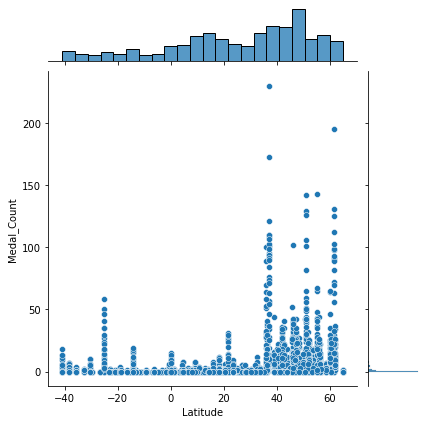

In [104]:
# Plot to compare two continuous variables
sns.jointplot(x="Latitude", y="Medal_Count", data=final_df)

In [105]:
# Dropping rows with 'Winter' for the season so these aren't included in the graph
summer_df = final_df[final_df.Season != 'Winter']

In [106]:
# Dropping rows with 'Summer' for the season so these aren't included in the graph
winter_df = final_df[final_df.Season != 'Summer']

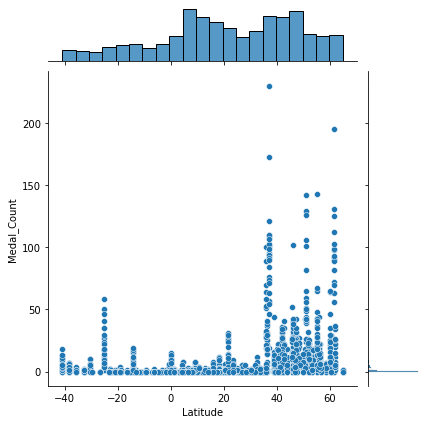

In [107]:
# Plot to compare two continuous variables with the summer_df
sns.jointplot(x="Latitude", y="Medal_Count", data=summer_df)

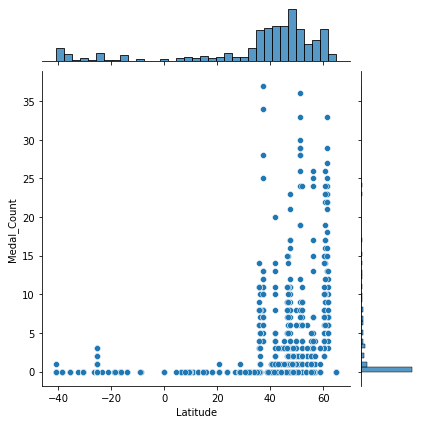

In [108]:
# Plot to compare two continuous variables with the winter_df
sns.jointplot(x="Latitude", y="Medal_Count", data=winter_df)

<AxesSubplot:>

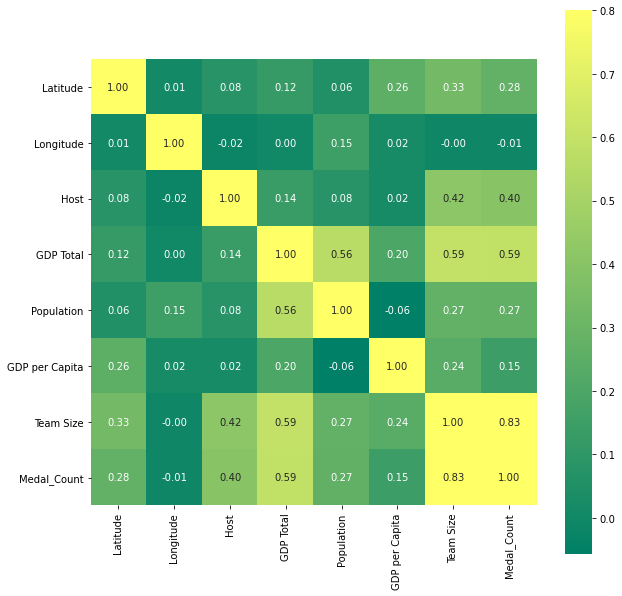

In [109]:
# Representing correlations between various features in the summer_df as a heatmap
corrmat = summer_df[['Latitude', 'Longitude', 'Host', 'GDP Total',
                     'Population', 'GDP per Capita',
                     'Team Size', 'Medal_Count']].corr()
f, ax = plt.subplots(figsize=(10,10))
# annot controls annotations, square=True outputs squares as correlation representing figures, cmap represents color map
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt=".2f", cmap="summer")

<AxesSubplot:>

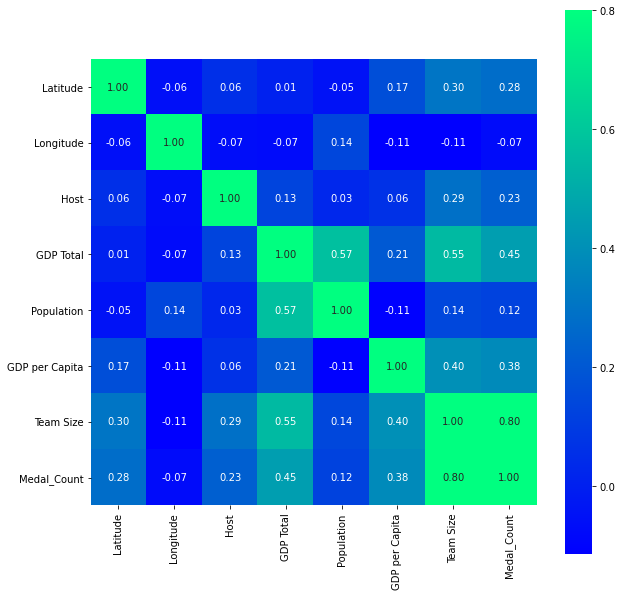

In [110]:
# Representing correlations between various features in the winter_df as a heatmap
corrmat = winter_df[['Latitude', 'Longitude', 'Host', 'GDP Total',
                     'Population', 'GDP per Capita',
                     'Team Size', 'Medal_Count']].corr()
f, ax = plt.subplots(figsize=(10,10))
# annot controls annotations, square=True outputs squares as correlation representing figures, cmap represents color map
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt=".2f", cmap="winter")

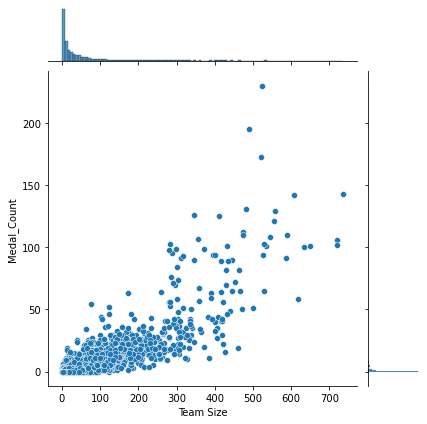

In [111]:
# Plot to compare two continuous variables with the final_df
sns.jointplot(x="Team Size", y="Medal_Count", data=final_df)

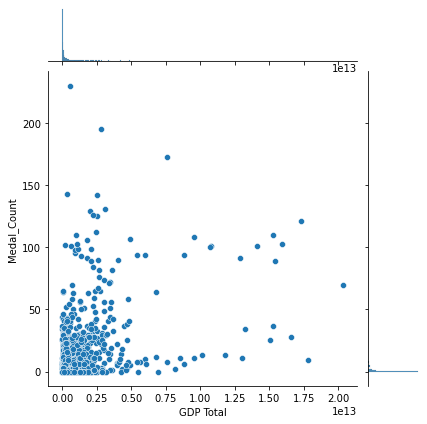

In [112]:
# Plot to compare two continuous variables with the final_df
sns.jointplot(x="GDP Total", y="Medal_Count", data=final_df)

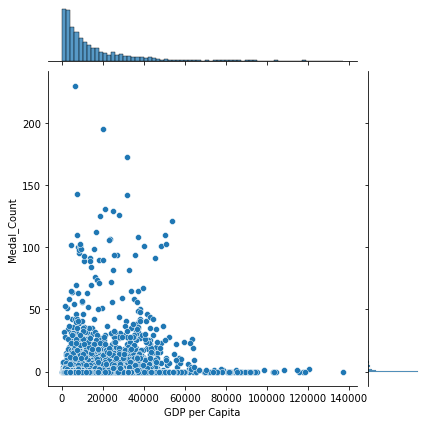

In [113]:
# Plot to compare two continuous variables with the final_df
sns.jointplot(x="GDP per Capita", y="Medal_Count", data=final_df)

array([[<AxesSubplot:xlabel='Year', ylabel='Year'>,
        <AxesSubplot:xlabel='Season (Binary)', ylabel='Year'>,
        <AxesSubplot:xlabel='Latitude', ylabel='Year'>,
        <AxesSubplot:xlabel='Longitude', ylabel='Year'>,
        <AxesSubplot:xlabel='Host', ylabel='Year'>,
        <AxesSubplot:xlabel='GDP Total', ylabel='Year'>,
        <AxesSubplot:xlabel='Population', ylabel='Year'>,
        <AxesSubplot:xlabel='Total Disciplines', ylabel='Year'>,
        <AxesSubplot:xlabel='Total Athletes', ylabel='Year'>,
        <AxesSubplot:xlabel='Total Events', ylabel='Year'>,
        <AxesSubplot:xlabel='Total Countries', ylabel='Year'>,
        <AxesSubplot:xlabel='GDP per Capita', ylabel='Year'>,
        <AxesSubplot:xlabel='Team Size', ylabel='Year'>,
        <AxesSubplot:xlabel='Medal_Count', ylabel='Year'>],
       [<AxesSubplot:xlabel='Year', ylabel='Season (Binary)'>,
        <AxesSubplot:xlabel='Season (Binary)', ylabel='Season (Binary)'>,
        <AxesSubplot:xlabel='Latitude',

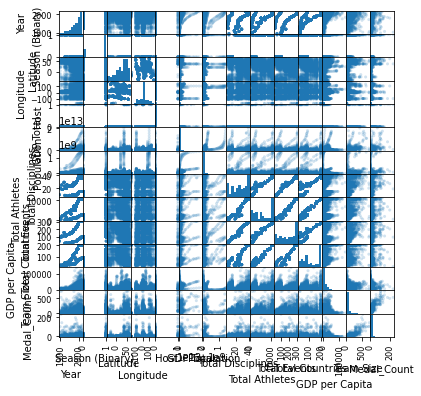

In [114]:
# Linear or patterns are better
pd.plotting.scatter_matrix(final_df, alpha=0.2, figsize=(6,6))

In [115]:
# sns.relplot(
#     data=penguins,
#     x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g"
# )